In [14]:
import pandas as pd

# Classification

We'll take a tour of the methods for classification in sklearn. First let's load a toy dataset to use:

In [1]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

Let's take a look

In [7]:
# Convert it to a dataframe for better visuals
df = pd.DataFrame(breast.data)
df.columns = breast.feature_names
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


And now look at the targets

In [9]:
print breast.target_names
breast.target

['malignant' 'benign']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

## Classification Trees

Using the scikit learn models is basically the same as in Julia's ScikitLearn.jl

In [25]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_depth=2, min_samples_leaf=140)
cart.fit(breast.data, breast.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=140,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Here's a helper function to plot the trees (you might have to [install graphviz manually](https://www2.graphviz.org/download/) for this to work)

In [58]:
import graphviz
import sklearn.tree
def visualize_tree(sktree):
    dot_data = sklearn.tree.export_graphviz(sktree, out_file=None, 
                                    filled=True, rounded=True,  
                                    special_characters=False)
    return graphviz.Source(dot_data)

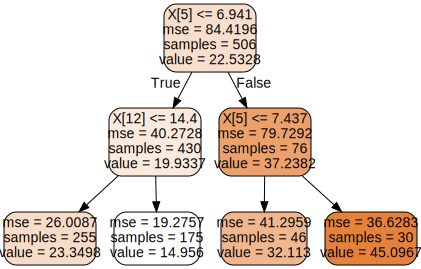

In [59]:
visualize_tree(cart)

We can get the label predictions with the `.predict` method

In [47]:
labels = clf.predict(breast.data)
labels

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0,

And similarly the predicted probabilities with `.predict_proba`

In [49]:
probs = clf.predict_proba(breast.data)
probs

array([[ 0.94210526,  0.05789474],
       [ 0.94210526,  0.05789474],
       [ 0.94210526,  0.05789474],
       ..., 
       [ 0.94210526,  0.05789474],
       [ 0.94210526,  0.05789474],
       [ 0.0083682 ,  0.9916318 ]])

Just like in Julia, the probabilities are returned for each class

In [50]:
probs.shape

(569, 2)

We can extract the second column of the probs by slicing, just like how we did it in Julia

In [54]:
probs = clf.predict_proba(breast.data)[:,1]
probs

array([ 0.05789474,  0.05789474,  0.05789474,  0.77857143,  0.05789474,
        0.77857143,  0.05789474,  0.05789474,  0.77857143,  0.77857143,
        0.05789474,  0.05789474,  0.05789474,  0.05789474,  0.77857143,
        0.05789474,  0.05789474,  0.05789474,  0.05789474,  0.77857143,
        0.77857143,  0.9916318 ,  0.05789474,  0.05789474,  0.05789474,
        0.05789474,  0.05789474,  0.05789474,  0.05789474,  0.05789474,
        0.05789474,  0.05789474,  0.05789474,  0.05789474,  0.05789474,
        0.05789474,  0.77857143,  0.9916318 ,  0.9916318 ,  0.77857143,
        0.77857143,  0.77857143,  0.05789474,  0.05789474,  0.77857143,
        0.05789474,  0.9916318 ,  0.77857143,  0.77857143,  0.77857143,
        0.9916318 ,  0.9916318 ,  0.9916318 ,  0.05789474,  0.05789474,
        0.9916318 ,  0.05789474,  0.05789474,  0.9916318 ,  0.9916318 ,
        0.9916318 ,  0.9916318 ,  0.05789474,  0.9916318 ,  0.05789474,
        0.05789474,  0.9916318 ,  0.9916318 ,  0.77857143,  0.99

To evaluate the model, we can use functions from `sklearn.metrics`

In [4]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [55]:
roc_auc_score(breast.target, probs)

0.95386078959885845

In [56]:
accuracy_score(breast.target, labels)

0.9226713532513181

In [57]:
confusion_matrix(breast.target, labels)

array([[179,  33],
       [ 11, 346]])

## Random Forests and Boosting

We use random forests and boosting in the same way as CART

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(breast.data, breast.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [60]:
labels = forest.predict(breast.data)
probs = forest.predict_proba(breast.data)[:,1]
print roc_auc_score(breast.target, probs)
print accuracy_score(breast.target, labels)
confusion_matrix(breast.target, labels)

1.0
1.0


array([[212,   0],
       [  0, 357]])

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
boost.fit(breast.data, breast.target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [64]:
labels = boost.predict(breast.data)
probs = boost.predict_proba(breast.data)[:,1]
print roc_auc_score(breast.target, probs)
print accuracy_score(breast.target, labels)
confusion_matrix(breast.target, labels)

1.0
1.0


array([[212,   0],
       [  0, 357]])

## Logistic Regression

We can also access logistic regression from sklearn

In [2]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(breast.data, breast.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
labels = logit.predict(breast.data)
probs = logit.predict_proba(breast.data)[:,1]
print roc_auc_score(breast.target, probs)
print accuracy_score(breast.target, labels)
confusion_matrix(breast.target, labels)

0.994595951588
0.959578207381


array([[198,  14],
       [  9, 348]])

The sklearn implementation has options for regularization in logistic regression. You can choose between L1 and L2 regularization:

![](http://scikit-learn.org/stable/_images/math/6a0bcf21baaeb0c2b879ab74fe333c0aab0d6ae6.png)


![](http://scikit-learn.org/stable/_images/math/760c999ccbc78b72d2a91186ba55ce37f0d2cf37.png)

Note that this regularization is adhoc and **not equivalent to robustness**. For a robust logistic regression, follow the approach from 15.680.

You control the regularization with the `penalty` and `C` hyperparameters. We can see that our model above used L2 regularization with $C=1$.

### Exercise

Try out unregularized logistic regression as well as L1 regularization. Which of the three options seems best? What if you try changing $C$?

In [11]:
# No regularization
logit = LogisticRegression(C=1e10)
logit.fit(breast.data, breast.target)
labels = logit.predict(breast.data)
probs = logit.predict_proba(breast.data)[:,1]
print roc_auc_score(breast.target, probs)
print accuracy_score(breast.target, labels)
confusion_matrix(breast.target, labels)

0.996115427303
0.97539543058


array([[202,  10],
       [  4, 353]])

In [12]:
# L1 regularization
logit = LogisticRegression(C=100, penalty='l1')
logit.fit(breast.data, breast.target)
labels = logit.predict(breast.data)
probs = logit.predict_proba(breast.data)[:,1]
print roc_auc_score(breast.target, probs)
print accuracy_score(breast.target, labels)
confusion_matrix(breast.target, labels)

0.998520162782
0.98769771529


array([[207,   5],
       [  2, 355]])

# Regression

Now let's take a look at regression in sklearn. Again we can start by loading up a dataset.

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Take a look at the X

In [15]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [18]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

## Regression Trees

We use regression trees in the same way as classification

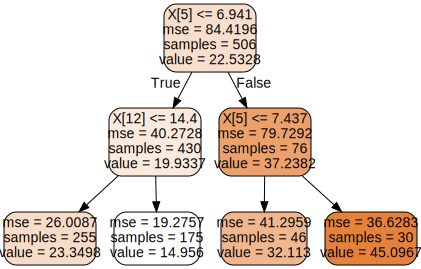

In [30]:
from sklearn.tree import DecisionTreeRegressor
cart = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5)
cart.fit(boston.data, boston.target)
visualize_tree(cart)

Like for classification, we get the predicted labels out with the `.predict` method

In [32]:
preds = cart.predict(boston.data)
preds

array([ 23.34980392,  23.34980392,  32.11304348,  32.11304348,
        32.11304348,  23.34980392,  23.34980392,  14.956     ,
        14.956     ,  14.956     ,  14.956     ,  23.34980392,
        14.956     ,  23.34980392,  23.34980392,  23.34980392,
        23.34980392,  14.956     ,  23.34980392,  23.34980392,
        14.956     ,  23.34980392,  14.956     ,  14.956     ,
        14.956     ,  14.956     ,  14.956     ,  14.956     ,
        23.34980392,  23.34980392,  14.956     ,  23.34980392,
        14.956     ,  14.956     ,  14.956     ,  23.34980392,
        23.34980392,  23.34980392,  23.34980392,  23.34980392,
        32.11304348,  23.34980392,  23.34980392,  23.34980392,
        23.34980392,  23.34980392,  23.34980392,  14.956     ,
        14.956     ,  14.956     ,  23.34980392,  23.34980392,
        23.34980392,  23.34980392,  14.956     ,  32.11304348,
        23.34980392,  23.34980392,  23.34980392,  23.34980392,
        23.34980392,  14.956     ,  23.34980392,  23.34

There are functions provided by `sklearn.metrics` to evaluate the predictions

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
print mean_absolute_error(boston.target, preds)
print mean_squared_error(boston.target, preds)
print r2_score(boston.target, preds)

3.57369097851
25.6994674521
0.695574477973


## Random Forests and Boosting

Random forests and boosting for regression work the same as in classification, except we use the `Regressor` version rather than `Classifier`.

### Exercise

Test and compare the (in-sample) performance of random forests and boosting on the Boston data with some sensible parameters.

In [36]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)
forest.fit(boston.data, boston.target)
preds = forest.predict(boston.data)
print mean_absolute_error(boston.target, preds)
print mean_squared_error(boston.target, preds)
print r2_score(boston.target, preds)

0.801559288538
1.38626831423
0.983578824891


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2)
boost.fit(boston.data, boston.target)
preds = boost.predict(boston.data)
print mean_absolute_error(boston.target, preds)
print mean_squared_error(boston.target, preds)
print r2_score(boston.target, preds)

0.755143261376
0.91245504218
0.989191425734


## Linear Regression Models

There are a large collection of linear regression models in sklearn. Let's start with a simple ordinary linear regression

In [40]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(boston.data, boston.target)
preds = linear.predict(boston.data)
print mean_absolute_error(boston.target, preds)
print mean_squared_error(boston.target, preds)
print r2_score(boston.target, preds)

3.272944638
21.8977792177
0.740607742865


We can also take a look at the betas:

In [41]:
linear.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

We can use regularized models as well. Here is ridge regression:

In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(boston.data, boston.target)
preds = ridge.predict(boston.data)
print mean_absolute_error(boston.target, preds)
print mean_squared_error(boston.target, preds)
print r2_score(boston.target, preds)
ridge.coef_

3.31644074172
22.6655141002
0.731513465219


array([-0.10035215,  0.0495466 , -0.04274506,  1.95345156, -2.37495926,
        3.69813184, -0.01067442, -1.24845527,  0.27901554, -0.0139895 ,
       -0.79833533,  0.0101167 , -0.56009659])

And here is lasso

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(boston.data, boston.target)
preds = lasso.predict(boston.data)
print mean_absolute_error(boston.target, preds)
print mean_squared_error(boston.target, preds)
print r2_score(boston.target, preds)
lasso.coef_

3.61055749324
26.7990335405
0.682549461751


array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

There are many other linear regression models available. See the [linear model documentation](http://scikit-learn.org/stable/modules/linear_model.html) for more.

### Exercise

The elastic net is another linear regression method that combines ridge and lasso regularization. Try running it on this dataset, referring to the documentation as needed to learn how to use it and control the hyperparameters.

In [57]:
from sklearn.linear_model import ElasticNet
net = ElasticNet(l1_ratio=0.3, alpha=1)
net.fit(boston.data, boston.target)
preds = net.predict(boston.data)
print mean_absolute_error(boston.target, preds)
print mean_squared_error(boston.target, preds)
print r2_score(boston.target, preds)
net.coef_

3.58894082814
26.4088605526
0.687171293536


array([-0.08667239,  0.05410097, -0.02494449,  0.        , -0.        ,
        0.93067079,  0.02104041, -0.79176208,  0.31313578, -0.01662641,
       -0.75729897,  0.00841911, -0.75674225])